<a href="https://colab.research.google.com/github/RYOTA2528/data_analysis_practice/blob/main/%5BDAY8%5DMatplotlib_learn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 洗練されたグラフの作成
# ggplotスタイルを使用
plt.style.use('ggplot')

# 図のサイズを設定 (幅10インチ、高さ8インチ)
plt.rcParams['figure.figsize'] = [10, 8]
# fontサイズを使用
plt.rcParams['font.size'] = 14

In [4]:
file_path = '/content/drive/MyDrive/pandas-dataset/dataset/dataset/house_price_jp.csv'
df = pd.read_csv(file_path, sep=',')
df.head()

,index,type,land_type,prefecture,city,city2,station_name,building_year,station_dis,price,price_per_tsubo,room,area,land_shape,frontage,gross_floor_area,building_type,city_plan,BCR,FAR
0,1,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１１丁目,2016,1,37000000,NaN,３ＬＤＫ,75,NaN,NaN,NaN,ＲＣ,商業地域,80.0,600.0
1,2,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１１丁目,2012,3,57000000,NaN,２ＬＤＫ,75,NaN,NaN,NaN,ＲＣ,商業地域,80.0,600.0
2,3,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１８丁目,1981,3,17000000,NaN,２ＬＤＫ,50,NaN,NaN,NaN,ＲＣ,商業地域,80.0,400.0
3,4,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１８丁目,1977,0,3200000,NaN,１Ｒ,20,NaN,NaN,NaN,ＳＲＣ,商業地域,80.0,400.0
4,5,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１８丁目,1989,2,17000000,NaN,２ＬＤＫ,50,NaN,NaN,NaN,ＳＲＣ,商業地域,80.0,400.0


In [6]:
df['Log10_price'] = df['price'].apply(lambda x: np.log10(x)) #対数
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19904 entries, 0 to 19903
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             19904 non-null  int64  
 1   type              19904 non-null  object 
 2   land_type         12261 non-null  object 
 3   prefecture        19904 non-null  object 
 4   city              19904 non-null  object 
 5   city2             19903 non-null  object 
 6   station_name      19769 non-null  object 
 7   building_year     19904 non-null  int64  
 8   station_dis       19766 non-null  object 
 9   price             19904 non-null  int64  
 10  price_per_tsubo   0 non-null      float64
 11  room              7209 non-null   object 
 12  area              19904 non-null  object 
 13  land_shape        12260 non-null  object 
 14  frontage          11282 non-null  float64
 15  gross_floor_area  12113 non-null  object 
 16  building_type     19242 non-null  object

In [7]:
df['station_dis'].unique()

array(['1', '3', '0', '2', '5', '4', '6', '11', '10', '30分?60分', '7',
       '12', '14', '18', '19', '25', '28', '26', '9', '29', '13', '20',
       '8', '16', '21', '24', '1H?1H30', '15', '22', '17', '1H30?2H',
       '23', nan, '2H?', '27', '8.0', '1.0', '14.0', '7.0', '6.0', '10.0',
       '9.0', '5.0', '3.0', '15.0'], dtype=object)

In [8]:
# 全体を数字にしたいため、NaNに一部変更し最後dropする
df['station_dis'] = pd.to_numeric(df['station_dis'], errors='coerce')
df['station_dis'].unique()

array([ 1.,  3.,  0.,  2.,  5.,  4.,  6., 11., 10., nan,  7., 12., 14.,
       18., 19., 25., 28., 26.,  9., 29., 13., 20.,  8., 16., 21., 24.,
       15., 22., 17., 23., 27.])

In [9]:
df['area'] = pd.to_numeric(df['area'], errors='coerce')
df['area'].unique()

array([  75.,   50.,   20.,   35.,  400.,  500.,   55.,   65.,   70.,
        250.,   30.,   45.,   60.,   80.,  280.,  175.,  460.,  100.,
         95.,  230.,   90.,   85.,  180.,  155.,  195.,   15.,  200.,
        105.,  320.,  270.,  370.,  110.,  240.,  220.,  210.,  380.,
        410.,  420.,   40.,  300.,   25.,  390.,  170.,  190.,   nan,
        160.,  150.,  130.,  115.,  125.,  185.,  260.,  350.,  310.,
        360.,  120.,  140.,  135.,  165.,  490.,  670.,  520.,  290.,
        145., 1100.,  330.,  620.,  550.,  680.,  430.,  810.,  470.,
        910., 1300.,  980.,  710.,  590.,  340., 1200.,  510.,  650.,
       1000.,  560., 1700., 1400., 1600.,  750.,  660., 1500.,  580.,
        640.,  450.,  760.,  530.,  720.,  830.,  440., 1800.,  480.,
        930.,  950.,  600.,  730.,  800.,  740.,  610.,  630.,  940.,
        990.,  880.,  890.,  920.,  780.,  790.,  970.,  870.,  770.,
        960.,  700.,  690.,  850.,  860.,  540., 1900.,  570.,  820.,
        840.,   10.,

In [10]:
# df.dropnaとsubsetを用いて先ほどのnanを削除
df = df.dropna(subset=['station_dis', 'area'])

In [11]:
df.info() #float64に変わった！

<class 'pandas.core.frame.DataFrame'>
Index: 15663 entries, 0 to 19895
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             15663 non-null  int64  
 1   type              15663 non-null  object 
 2   land_type         8439 non-null   object 
 3   prefecture        15663 non-null  object 
 4   city              15663 non-null  object 
 5   city2             15662 non-null  object 
 6   station_name      15663 non-null  object 
 7   building_year     15663 non-null  int64  
 8   station_dis       15663 non-null  float64
 9   price             15663 non-null  int64  
 10  price_per_tsubo   0 non-null      float64
 11  room              6812 non-null   object 
 12  area              15663 non-null  float64
 13  land_shape        8438 non-null   object 
 14  frontage          7820 non-null   float64
 15  gross_floor_area  8336 non-null   object 
 16  building_type     15209 non-null  object 
 17

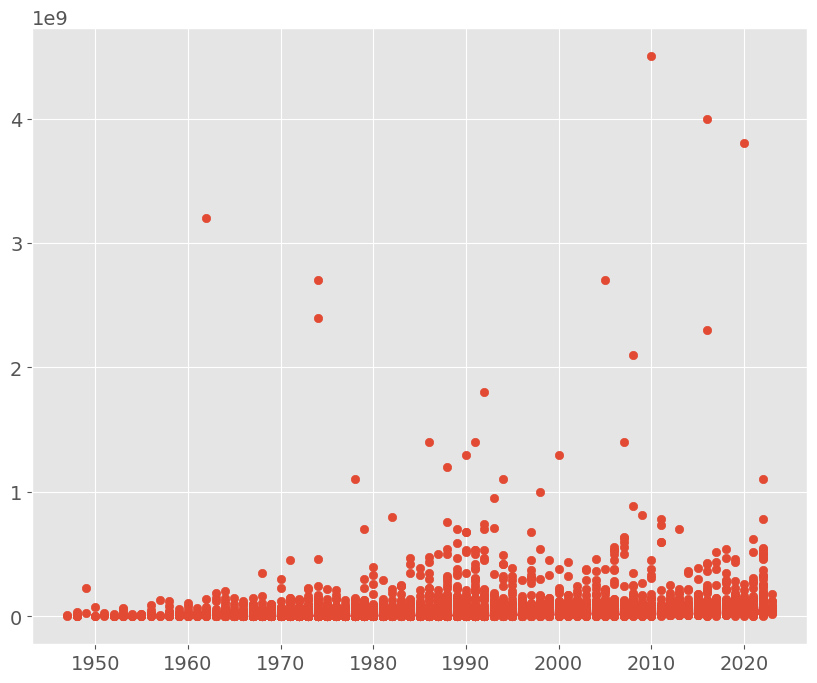

In [12]:
# 散布図
plt.scatter(df['building_year'], df['price'])

Text(0, 0.5, 'Log10 Price')

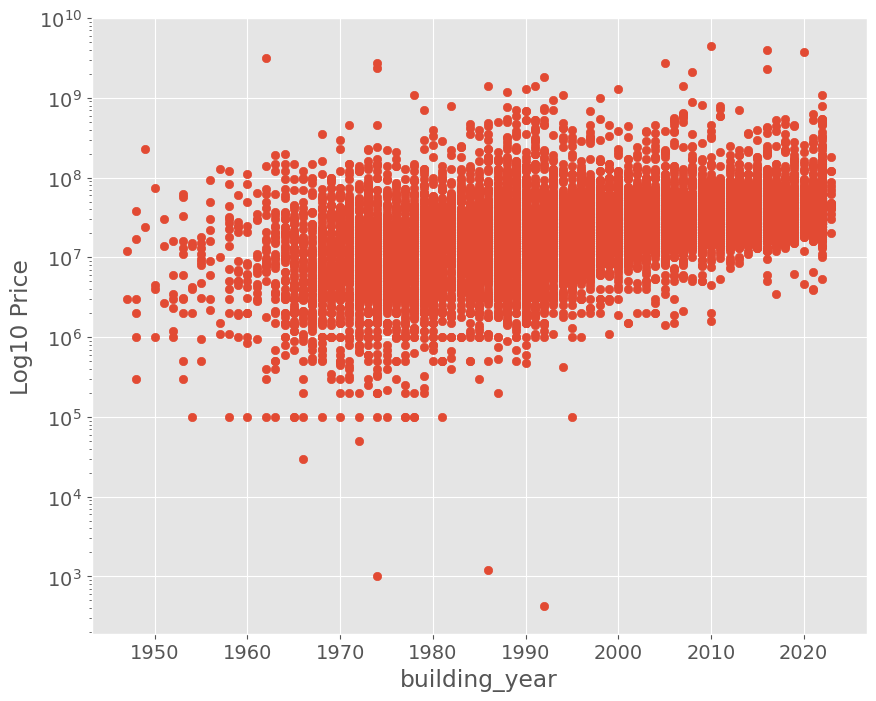

In [13]:
# 対数の散布図で変化をわかりやすく見る
plt.scatter(df['building_year'], df['price'])
plt.yscale('log')
plt.xlabel('building_year')
plt.ylabel('Log10 Price')

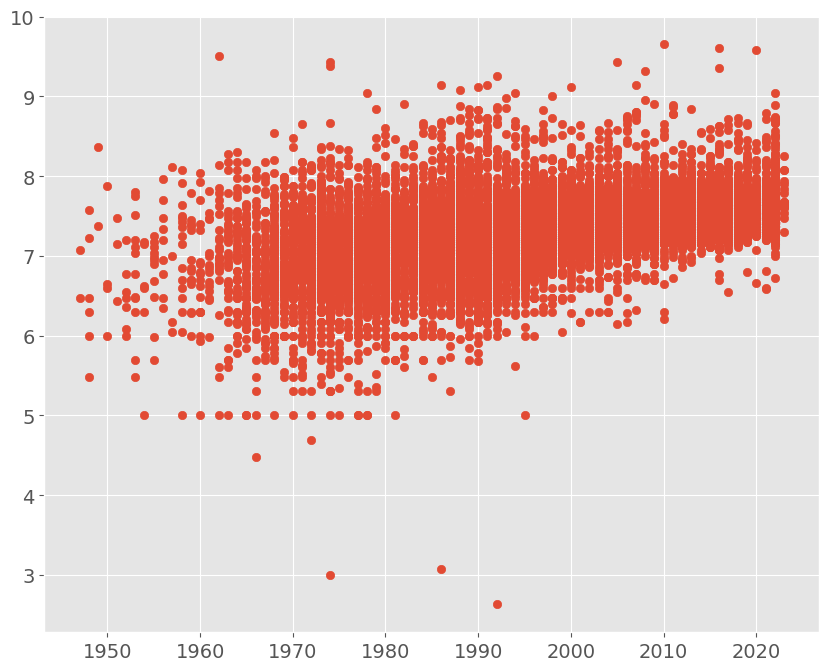

In [14]:
#先ほどLog_priceというカラムで対数を格納したため利用してみる
#(df['Log10_price'] = df['price'].apply(lambda x: np.log10(x)) #対数)

plt.scatter(df['building_year'], df['Log10_price'])
# Y軸が外れ値でつぶされてしまう場合にはこのように対数のグラフを作ることで解消

In [20]:
# 部屋タイプごとに分布を確認してみる
df['room'].unique()

array(['３ＬＤＫ', '２ＬＤＫ', '１Ｒ', '１ＤＫ', nan, '１ＬＤＫ', '２ＤＫ', '４ＬＤＫ', '１Ｋ',
       '３ＬＤＫ＋Ｓ', '２ＬＤＫ＋Ｓ', '５ＬＤＫ', 'オープンフロア', '１ＬＤＫ＋Ｓ', '３ＤＫ', '４ＤＫ',
       '２Ｋ', '２ＤＫ＋Ｓ', '１ＤＫ＋Ｓ', '３ＤＫ＋Ｓ', '３Ｋ', '４ＬＤＫ＋Ｓ', '４Ｋ', '５ＤＫ'],
      dtype=object)

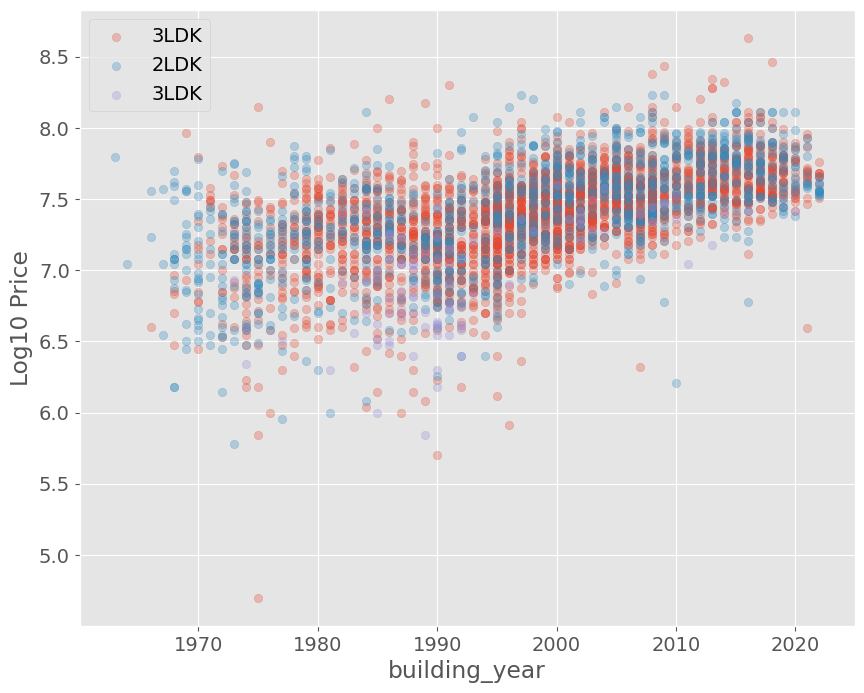

In [22]:
# 3LDK, 2LDK, 1Rのラベルつきの散布図を作成(alphaは点が重なってしまうため府透明度調整)
target_df = df.query('room == "３ＬＤＫ"')
plt.scatter(target_df['building_year'], target_df['Log10_price'], label='3LDK', alpha=0.3)
target_df = df.query('room == "２ＬＤＫ"')
plt.scatter(target_df['building_year'], target_df['Log10_price'], label='2LDK', alpha=0.3)
target_df = df.query('room == "１Ｒ"')
plt.scatter(target_df['building_year'], target_df['Log10_price'], label='3LDK', alpha=0.3)

plt.xlabel('building_year')
plt.ylabel('Log10 Price')
plt.legend()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65299 (\N{FULLWIDTH DIGIT THREE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65324 (\N{FULLWIDTH LATIN CAPITAL LETTER L}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65316 (\N{FULLWIDTH LATIN CAPITAL LETTER D}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65323 (\N{FULLWIDTH LATIN CAPITAL LETTER K}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65298 (\N{FULLWIDTH DIGIT TWO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65297 (\N{FULLWIDTH DIGIT ON

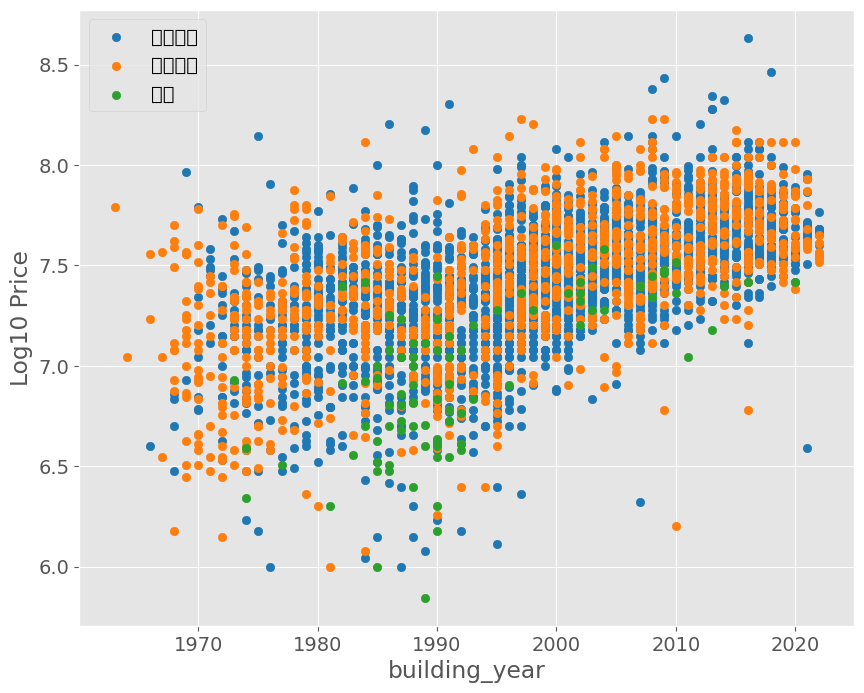

In [15]:
room_list = ['３ＬＤＫ', '２ＬＤＫ', '１Ｒ']
room_labels = ['３ＬＤＫ', '２ＬＤＫ', '１Ｒ']
cmap = plt.get_cmap('tab10') #get_cmapを使用し色を変更
for i, room in enumerate(room_list): #enumerateでリストにインデックスを付与
  target_df = df.query('room == @room')
  plt.scatter(target_df['building_year'], target_df['Log10_price'], label=room_labels[i], color=cmap(i))

  plt.xlabel('building_year')
  plt.ylabel('Log10 Price')
  plt.legend()